In [ ]:
""" Introduction to Keras and Tensorflow (Optional Pytorch). Configure and use google colab and kaggle GPU  """

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Loading and preprocessing the dataset
df = pd.read_csv("diabetes.csv")
x = df.iloc[:, 0:8]  # Features
y = df["Outcome"]    # Target

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.1)

In [6]:
# Building the model
model = models.Sequential()
model.add(layers.Dense(100, activation="relu"))
# model.add(layers.Dense(75, activation="relu"))  # Optional hidden layer
model.add(layers.Dense(50, activation="relu"))
# model.add(layers.Dense(25, activation="relu"))  # Optional hidden layer
model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [7]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Training the model
history = model.fit(
    X_train, Y_train,
    epochs=50,
    validation_data=(X_test, Y_test)
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6606 - loss: 0.6541 - val_accuracy: 0.6234 - val_loss: 0.5793
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6593 - loss: 0.5579 - val_accuracy: 0.7013 - val_loss: 0.5025
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.4986 - val_accuracy: 0.8182 - val_loss: 0.4569
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7748 - loss: 0.4640 - val_accuracy: 0.7922 - val_loss: 0.4240
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.4467 - val_accuracy: 0.8182 - val_loss: 0.4100
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.4595 - val_accuracy: 0.8182 - val_loss: 0.4078
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7789 - loss: 0.4394 - val_accuracy: 0.8312 - val_loss: 0.4119
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.4196 - val_accuracy: 0.8182 - val_loss

In [8]:
result = model.evaluate(X_test, Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7048 - loss: 0.7357 


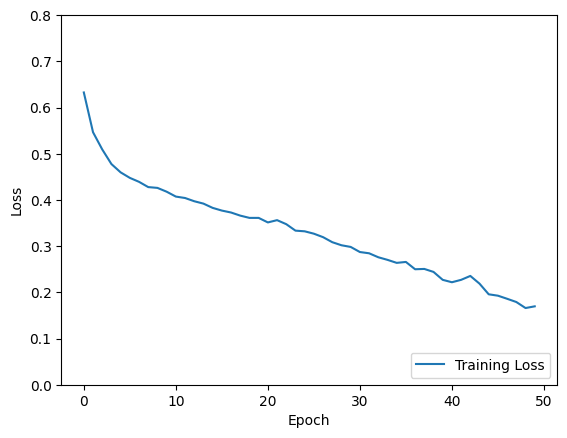

In [9]:
# Plotting the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower right')
plt.show()

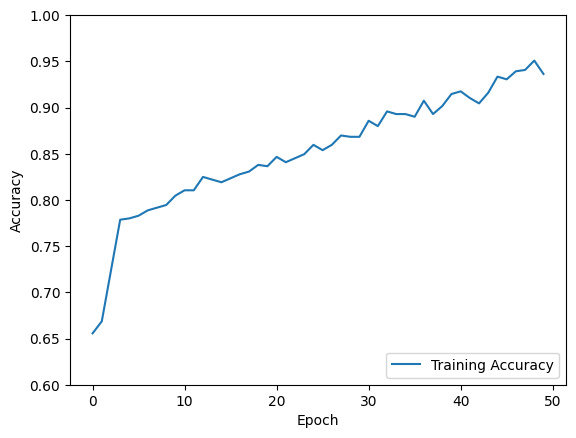

In [10]:
# Plotting the training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Uncomment if validation accuracy is needed:
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='lower right')
plt.show()

In [11]:
# Final evaluation on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

3/3 - 0s - 10ms/step - accuracy: 0.7143 - loss: 0.7062
Test Loss: 0.7061890363693237, Test Accuracy: 0.7142857313156128


In [12]:
# Sample data for prediction (replace with your own input)
sample_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Example: A single data row from the dataset

# Scaling the sample data (important to match the model's input scale)
sample_data_scaled = scaler.transform(sample_data)

# Making a prediction
prediction = model.predict(sample_data_scaled)

# Output the result
print("Prediction (Probability):", prediction[0][0])
print("Predicted Class:", "Diabetic" if prediction[0][0] >= 0.5 else "Non-Diabetic")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Prediction (Probability): 0.9927808
Predicted Class: Diabetic


c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
